In [31]:
#Task: To try and predict the prices of houses using a rules engine.
#      A rules engine is simply a software that takes an input, folows a set of rules and outputs the results. 
# Type of problem:

In [52]:
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt



In [33]:
#installing the dataset
pwd = os.getcwd() #gets the working directory
filepath = os.path.join(pwd, 'housing.csv') # working directory + the housing.csv file makes this filepath 
filepath

'c:\\Users\\MrCra\\Desktop\\work\\Python\\House-real-estate-prediction-\\housing.csv'

In [34]:
#dataset
housing_data  = pd.read_csv(filepath)
housing_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [35]:
housing_data.info() # findout information of the datatypes of the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: ylabel='ocean_proximity'>

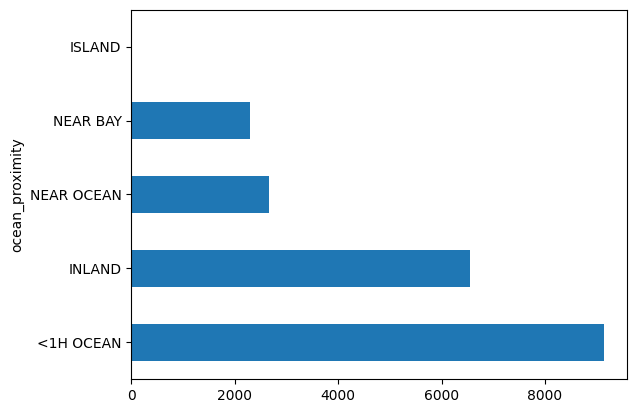

In [36]:
#what is ocean_promixity, the only one that is an object which is a string and a class based 
housing_data['ocean_proximity'].value_counts().plot(kind='barh')
#how many houses are close to the ocean depending on the different classes


In [37]:
#describe(), statistical measures of the numerical columns
housing_data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

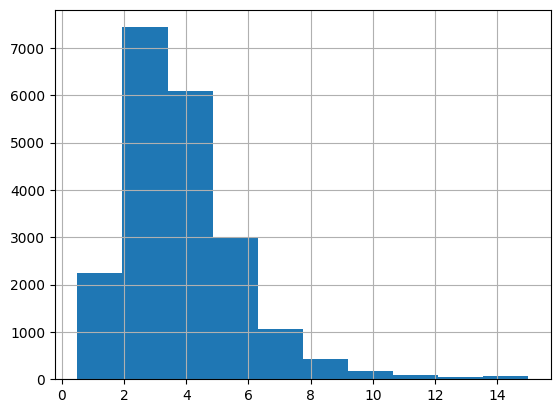

In [38]:
housing_data['median_income'].hist()

In [39]:
housing_data['income_cat'] = pd.cut(housing_data['median_income'],
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels=[1,2,3,4,5])
housing_data['income_cat'].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

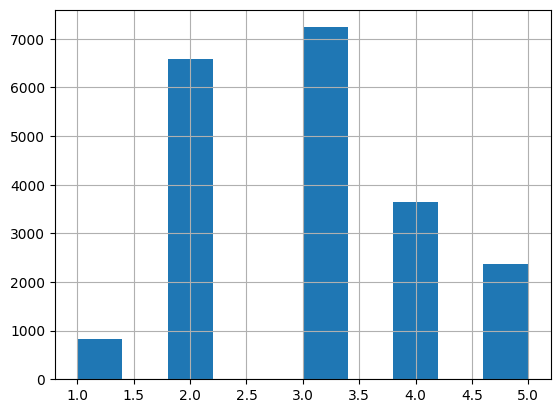

In [40]:
housing_data['income_cat'].hist()

In [41]:
#preparing data for visualisation process
y = housing_data['median_house_value'] # features/labels, what needs to be predicted 
X = housing_data.drop('median_house_value', axis=1) # what will use to predict 
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


#SPLIT DATASETS


In [42]:
#We want to do this before any substantial visualizations that way we can avoid biases inherent to the visualization process
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) 
X_train
# convention for splitting dataset to trainning dataset and testing dataset 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1205,-121.71,39.42,21.0,1432.0,284.0,862.0,275.0,2.2813,INLAND,2
9936,-122.30,38.25,18.0,3548.0,880.0,1476.0,699.0,3.7188,NEAR BAY,3
6024,-117.76,34.05,36.0,3839.0,1004.0,4711.0,942.0,2.3859,INLAND,2
20288,-119.17,34.17,25.0,1596.0,321.0,1378.0,308.0,4.0074,NEAR OCEAN,3
6504,-118.06,34.08,37.0,778.0,205.0,850.0,198.0,2.5119,<1H OCEAN,2
...,...,...,...,...,...,...,...,...,...,...
15958,-122.46,37.71,47.0,1527.0,283.0,1102.0,282.0,4.0000,NEAR OCEAN,3
18871,-122.21,38.09,37.0,4368.0,779.0,2083.0,741.0,3.8667,NEAR BAY,3
20470,-118.74,34.27,23.0,2493.0,522.0,1488.0,505.0,4.1800,<1H OCEAN,3
16003,-122.45,37.75,35.0,1363.0,302.0,1786.0,301.0,3.0804,NEAR BAY,3


<Axes: >

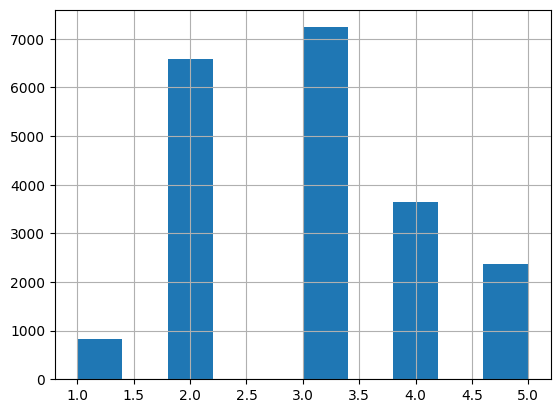

In [43]:
housing_data['income_cat'].hist() 
# reason for looking at incomecat is because we're prediciting the median  
#income for determing median house of the price

<Axes: >

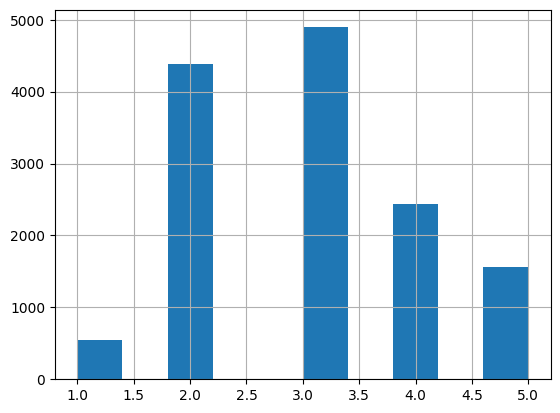

In [44]:
X_train['income_cat'].hist() #need to check that training data set is approximately same as our original datasaet

<Axes: >

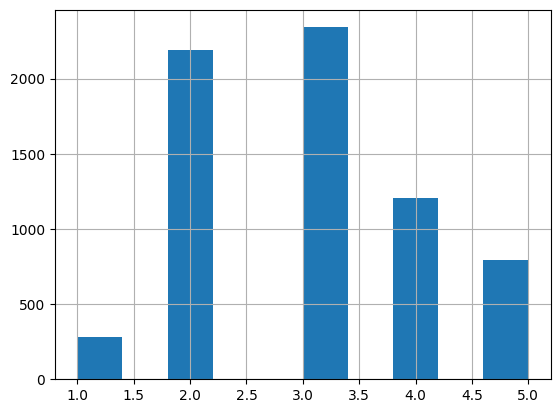

In [45]:
#incase 
X_test["income_cat"].hist()

# Stratified Splits
This technique ensures that our train and tests sets have the same approximate distribution

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [47]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [48]:
housing_data["income_cat"].value_counts() / len(housing_data)
# the results prove that the values of the income cat are approximately the same as the ones in the strat test

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [49]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing_data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [50]:
strat_train_set.drop("income_cat", axis="columns", inplace=True)
strat_test_set.drop("income_cat", axis="columns", inplace=True)
#we dont need this anymore

# Visualising our Data
Data visualization is a very important part of any modeling process. Statistics alone can very rarely tell us what we need to know about a dataset. Visualizing data can even reveal obvious patterns that we didn't notice between datasets because all of the measures of central tendancy (mean, median, mode) are the exact same between them. 

In [51]:
housing = strat_train_set.copy()

# Histograms

Histograms are a great way to start off the visualisation process. They help us distribute our data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

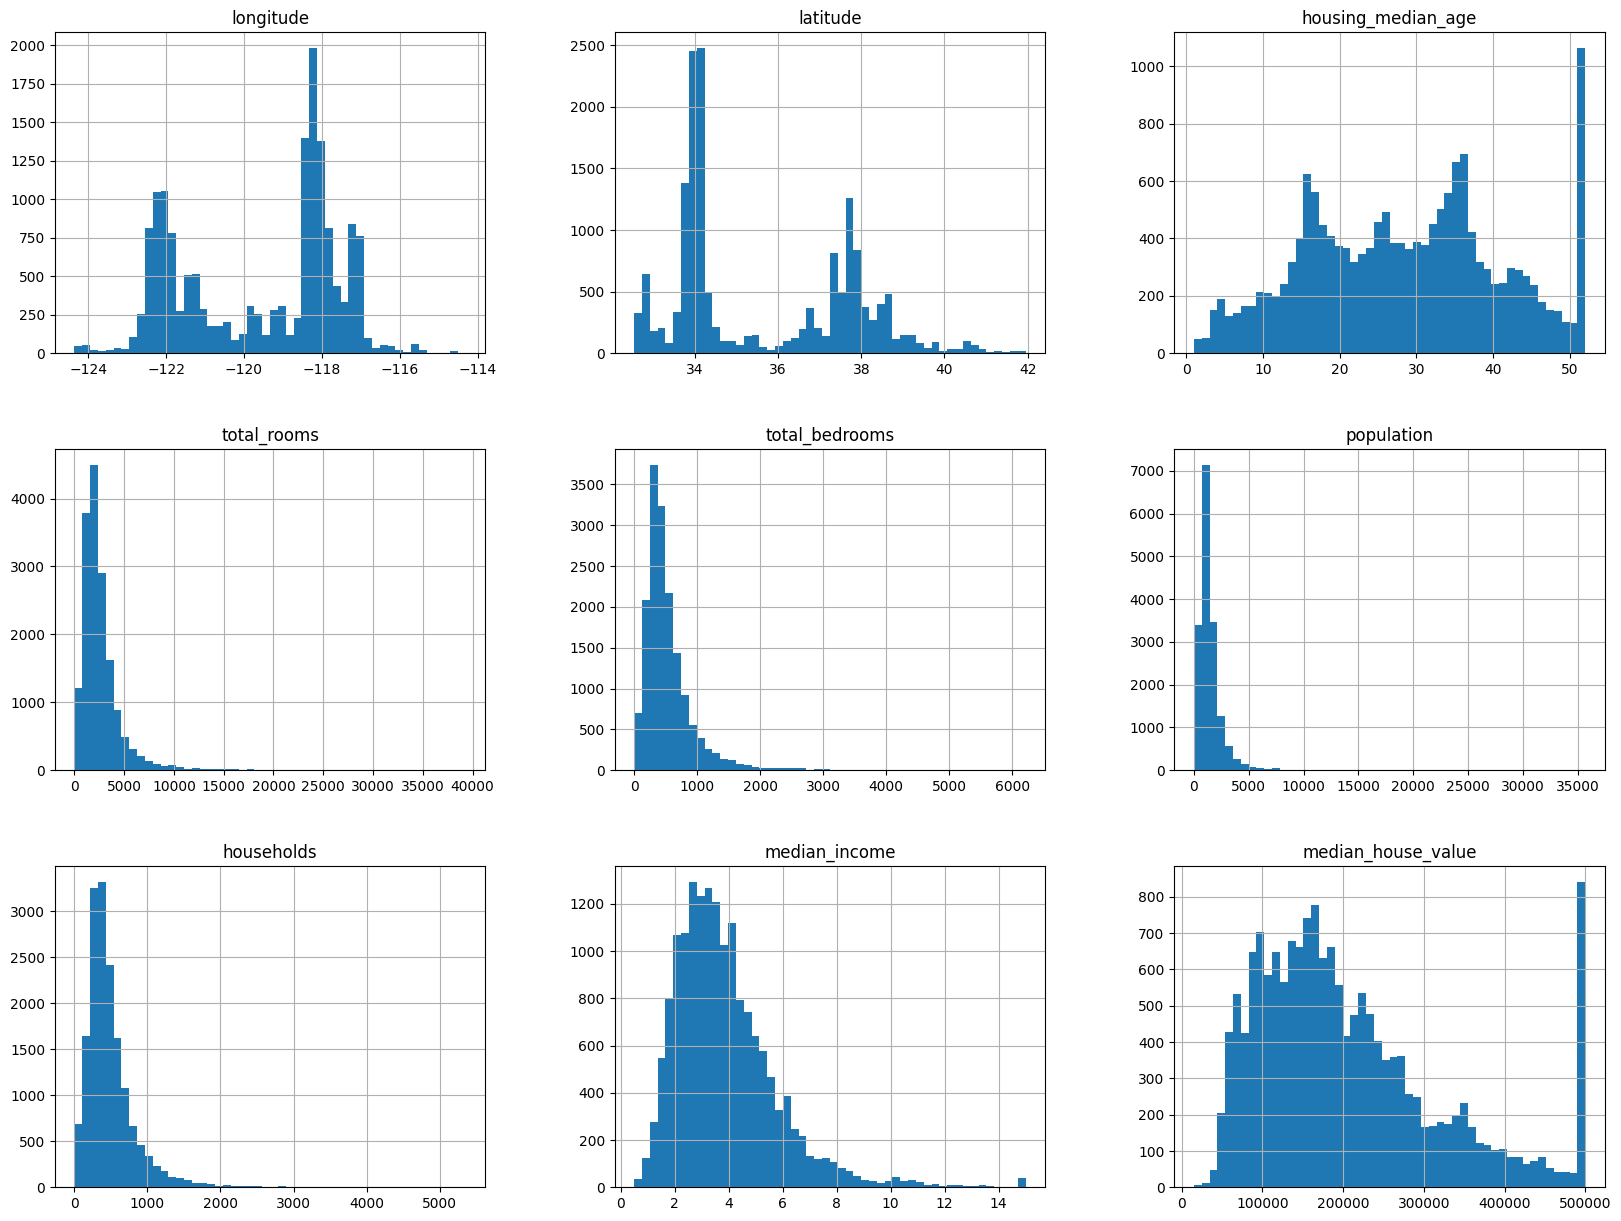

In [54]:
housing.hist(bins=50, figsize=(20, 15))

<Axes: >

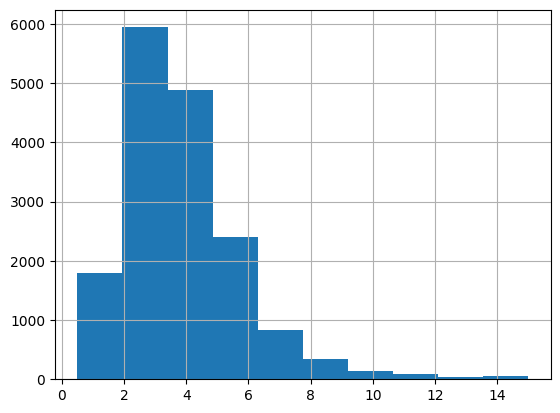

In [55]:
housing["median_income"].hist()

# Plotting Geographic data 

If you have longitudes and latitudes you should plot them on a map to see what patterns reveal themselves. It is better to do this kind of visualization in Tableau or PowerBI. PowerBI is free on Windows, and Tableau has a Public version which is free on Mac or Windows. You'll save a lot of time and have an output that looks better and is easy to make different iterations of. 

<Axes: xlabel='longitude', ylabel='latitude'>

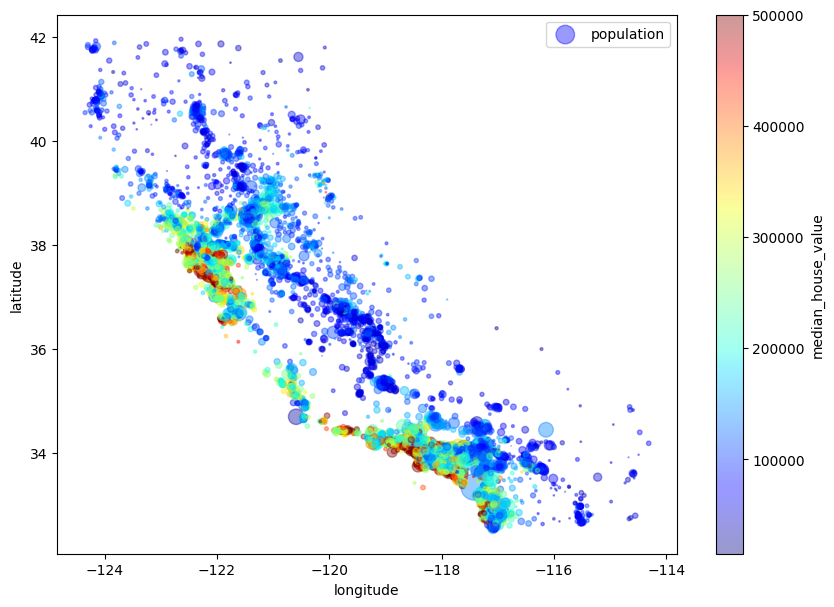

In [64]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

### Correlation Matrices

A correlation matrix is grid that shows the correlation coefficient of every numerical variable against every other numerical variable. It can be a good way to quickly see which variables are of particular interest for your target variable

In [71]:
housing.loc[:,:'median_house_value'].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


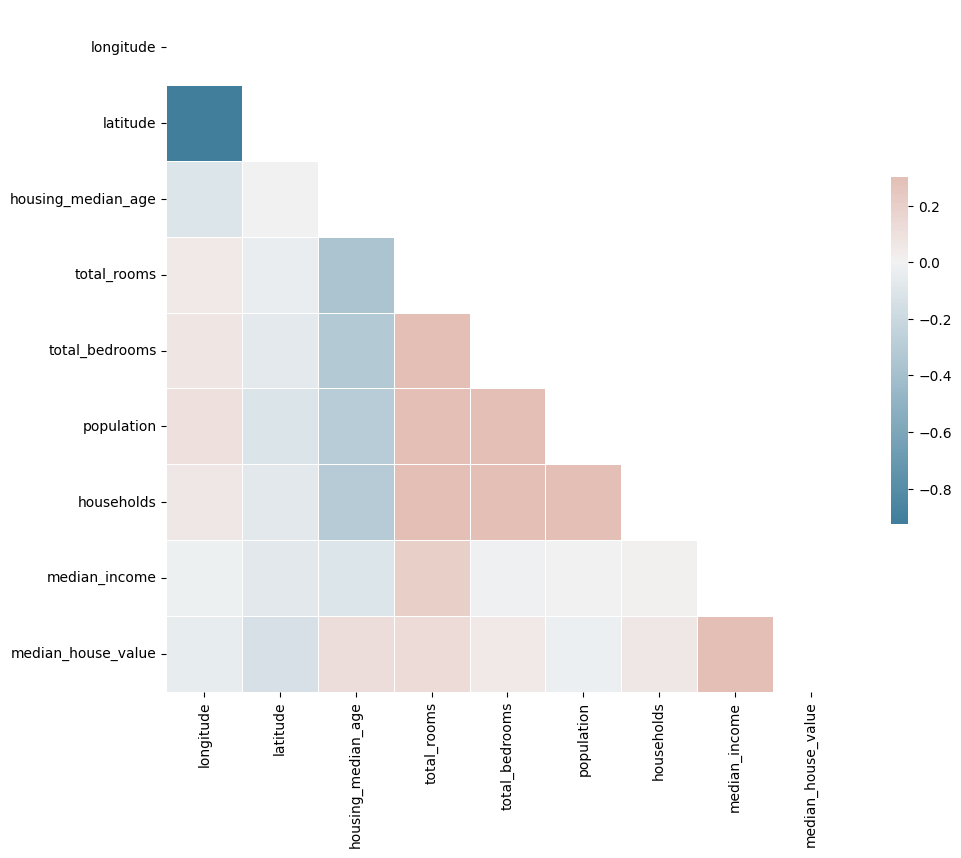

In [70]:
import seaborn as sns



corr = housing.loc[:,:'median_house_value'].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


# Preparing Data for Machine Learning

Data preparation is oftentimes the most time-consuming step of the modeling process. It is also one of the most important with model accuracy often contingent on the quality of data inserted. To this end, we'll be applying the following transformations on this data, not in this particular order:

-  **Feature Engineering:** Creating new features (columns) out of our raw data using domain knowledge

- **Imputation:** Inserting values where they might be missing to have a complete dataset

- **Encoding Categorical Variables:** Transforming categorical variables into some numerical variation

- **Scaling:** Applying a scaler that transforms all of our data on the same numerical scale 